<a href="https://colab.research.google.com/github/manjirikulkarni03/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/INDIVIDUAL_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Unsupervised Classification


# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"Netflix content Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Netflix content Dataset: Rows= 7787, Columns= 12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


Its good to see that we do not have any duplicated observations in our dataset.

#### Missing Values/Null Values

In [8]:
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

In [9]:
Complete_columns_info(df)

 selected dataframe has 12 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


<AxesSubplot:>

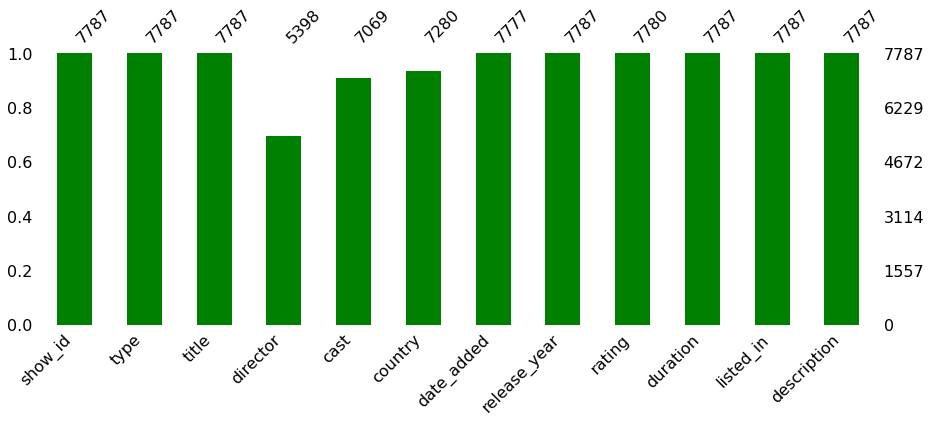

In [10]:
# Visualizing the missing values
msno.bar(df,figsize=(15,5), color="green")

### What did you know about your dataset?

We get to know the following points about our dataset:
1. The dataset contains 7787 rows and 12 columns.
2. The dataset don't have any duplicated observations.
3. All features are object type except release_year.
4. The null values present in 'director', 'cast', 'country', 'date_added' and 'ratting' features with the percentage of 30.7%, 9.2%, 6.5%, 0.1%, 0.1% respectively.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [12]:
#basic description
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

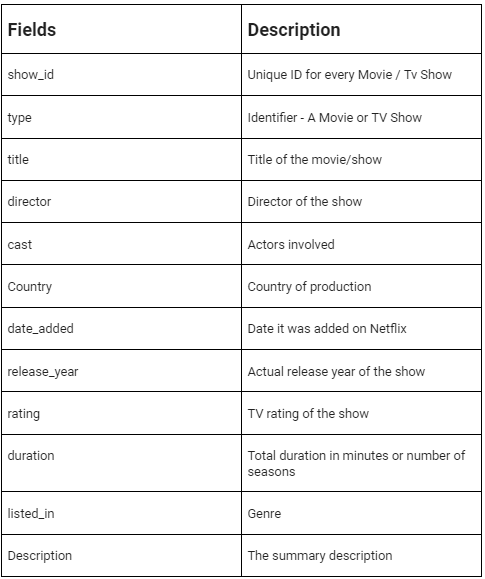

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


##***3. Data Wrangling***

### Data Wrangling Code

In [14]:
#creating copy of dataset
netflix=df.copy()

In [18]:
# Handling the missing values
netflix.fillna('Unknown',inplace=True)
#netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])


In [19]:
#rechecking null values
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
#creating new dataframe without observations having date_added feature as 'Unknown'
new_df=netflix[netflix['date_added']!='Unknown']

In [25]:
#changing dtype of date_added to datetime
new_df['date_added']=pd.to_datetime(new_df['date_added'])


In [26]:
#extracting new feature like year and month and date from date_added
new_df['day_added'] = new_df['date_added'].dt.day            
new_df['year_added'] = new_df['date_added'].dt.year          
new_df['month_added'] = new_df['date_added'].dt.month

In [27]:
#dropping date_added feature as we have extracted new features from it
new_df.drop(['date_added'],axis=1,inplace=True)

In [28]:
#checking shape after excluding unknown values from date_added feature.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  day_added     7777 non-null   int64 
 12  year_added    7777 non-null   int64 
 13  month_added   7777 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 911.4+ KB


In [29]:
# Choosing the lead cast,director and country to simplify the analysis
new_df['country'] = new_df['country'].apply(lambda x: x.split(',')[0])
new_df['cast'] = new_df['cast'].apply(lambda x: x.split(',')[0])
new_df['director'] = new_df['director'].apply(lambda x: x.split(',')[0])

We have successfully handled all null values from our dataset.

### What all manipulations have you done and insights you found?

1. We have replaced null values from director, cast and country as 'unknown' they are containing high amount of outliers.
2. The missing values in rating had imputed with its mode, since this attribute is discrete.
3. As there are only 10 records having date_added as missing value. so we have dropped them.
4. Changed dtype of date_added with datetime and extracted two new features as date_added_month and date_added_year.
5. Splitted duration column and changed its dtype to int.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1 (Distribution of TV Show and movie)

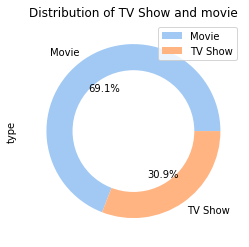

In [ ]:
# Setting labels for items in Chart
type = netflix["type"].value_counts()

# Pie Chart
netflix["type"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {'linewidth': 2,'antialiased': True})
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# # Adding Title of chart
plt.title('Distribution of TV Show and movie')

# Displaying Chart
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted donut chart to visualize the distribution of TV Show and movie.This type of chart can help to compare individual categories or dimensions to the larger whole, just like a pie chart, but with a couple of advantages. Donut charts can make it easier for us to compare individual dimensions.

##### 2. What is/are the insight(s) found from the chart?

As we can see number of TV Shows are approx 70% while movies are approx 31%.Netflix stream more TV Shows than movies.

#### Chart - 2 (Countplot for Rating)

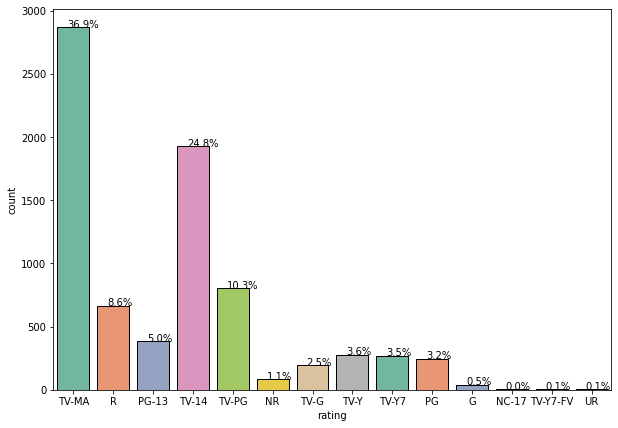

In [ ]:
plt.figure(figsize=(10,7))

ax=sns.countplot(netflix['rating'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(netflix['rating']))), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.We have choosed count plot to check the amount of appearence of ratings.

##### 2. What is/are the insight(s) found from the chart?

From the above graph, we can conclude that most of the TV Shows/Movies are rated with 'TV-MA' followed with TV-14 and there are less number of movies which are rated with TV-Y7-FV and UR.least number of shows are rated with NC-17.














##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.

#### Chart - 3 (Shows added each month and year)

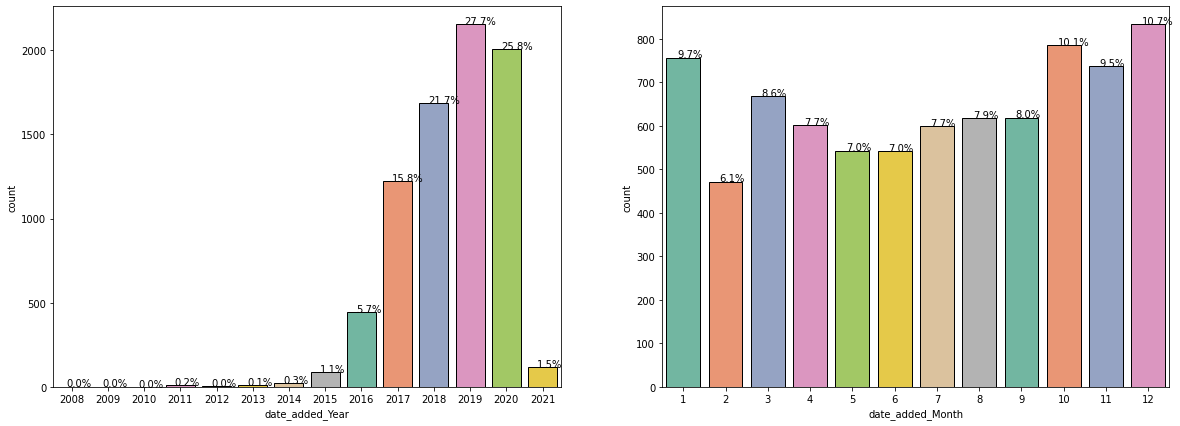

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
ax=sns.countplot(netflix['date_added_Year'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(netflix['date_added_Year']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1,2,2)
ax=sns.countplot(netflix['date_added_Month'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(netflix['date_added_Month']))), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.We have choosed count plot to check in which month and year more shows/movies are added on netflix.

##### 2. What is/are the insight(s) found from the chart?

Netflix continuous to add more shows on its platform over the years.
There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.Over the years a greater number of shows were added in the months of October, November, December, and January.














##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.

#### Chart - 4 (Shows released and added on netflix each year)

Text(0.5, 1.0, 'distribution by released year')

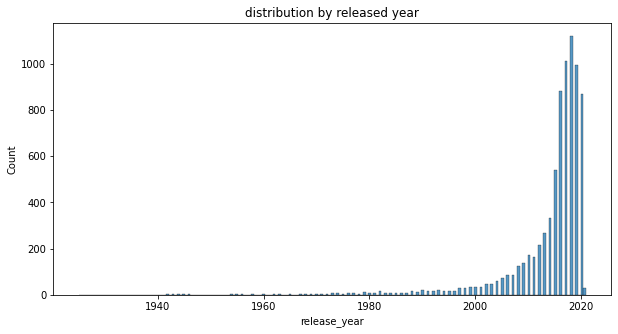

In [ ]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(netflix['release_year'])
plt.title('distribution by released year')



##### 1. Why did you pick the specific chart?

We have choosed histogram to check in which month and year more shows/movies are released and added on netflix.Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

Netflix has greater number of new movies / TV shows than the old ones.Even we can state from the graph that number of movie's releasing and getting added on Netflix has been increased since 2000 and the graph exceeded in large amount afterwards.Decrease in the number of shows released/added in the year 2020, might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.














##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.

#### Chart - 5 (Length of movies and shows)

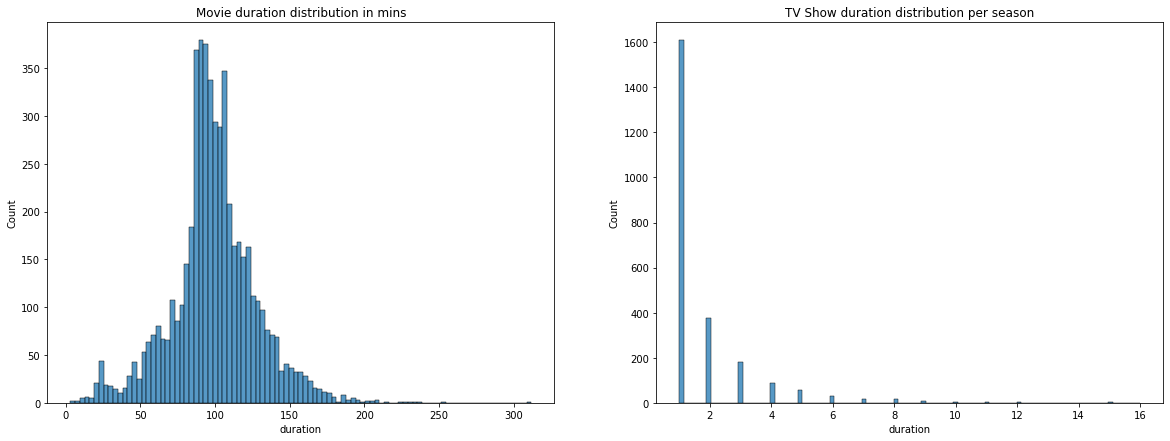

In [ ]:
# length of movie analysis
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.histplot(x='duration',data=netflix[netflix['type']=='Movie'])
plt.title('Movie duration distribution in mins')

plt.subplot(1,2,2)
sns.histplot(x='duration',data=netflix[netflix['type']=='TV Show'])
plt.title('TV Show duration distribution per season')

plt.show()

##### 1. Why did you pick the specific chart?

We have choosed histogram to check duration of movies and shows on netflix.Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.Average duration of movie is approx 100 mins.Maximum number of TV Shows are having only one season.In the dataset we have shows ranging up to 16 seasons.Reason behind majority are having only one season might be that many TV shows has only recently begun, and that further seasons are on the way.
There are very few TV shows that have more than 8 seasons.














##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.

### Bivariate Analysis

#### Chart - 1 (Famous actors from Movies and shows)

In [ ]:
# Choosing the primary country,cast and director to simplify the analysis
#netflix['country'] = netflix['country'].apply(lambda x: x.split(',')[0])
netflix['cast'] = netflix['cast'].apply(lambda x: x.split(',')[0])
#netflix['director'] = netflix['director'].apply(lambda x: x.split(',')[0])

Text(0.5, 1.0, 'Actors who have appeared in highest number of Movies')

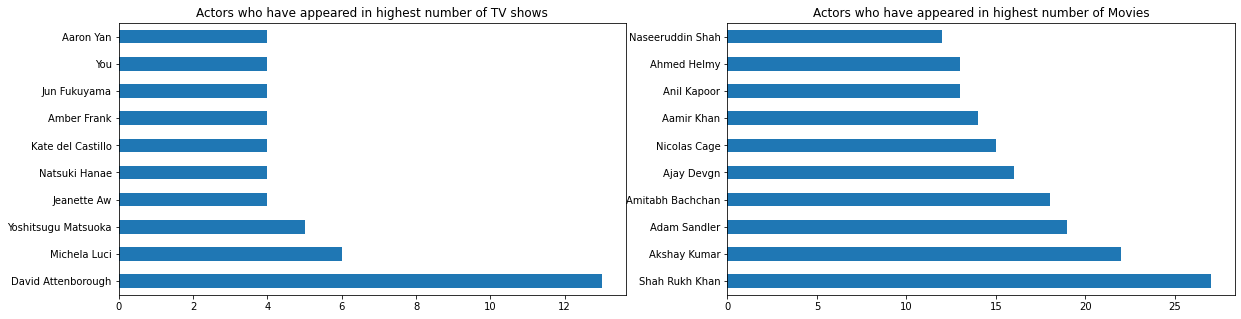

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
netflix[~(netflix['cast']=='Unknown') & (netflix['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')

plt.title('Actors who have appeared in highest number of TV shows')

# Top actors for movies
plt.subplot(1,2,2)
netflix[~(netflix['cast']=='Unknown') & (netflix['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of Movies')

##### 1. Why did you pick the specific chart?

We have plotted above bar plot to check top 10 actors appeared in TV Shows and movies.We have used bar plot as it is used to represent categorical data, which is data that can be divided into distinct categories. 







##### 2. What is/are the insight(s) found from the chart?

We can conclude that David Attenborough is the most famous actor who has been casted in most of the TV Shows.Whereas Shahrukh Khan is famous actor from movies point of view followed by Akshay Kumar.

#### Chart - 2 (Checking top genres)

In [ ]:
#splitting genres and storing into list
genre_list=netflix.listed_in.str.split(', ')


In [ ]:
#creating dict to store all genres
genre_dict={}
for genre in genre_list:
  for x in genre:
    if x in genre_dict:
      genre_dict[x]=genre_dict[x]+1
    else:
      genre_dict[x]=1

In [ ]:
# converting the dict to a data frame 
genre_df=pd.DataFrame.from_dict([genre_dict]).transpose().reset_index().rename(
    columns={'index':'genre',0:'Number of Movies/Shows'})

In [ ]:
#top 5 genres
genre_df.sort_values('Number of Movies/Shows', ascending =False)[:5]

,genre,Number of Movies/Shows
4,International Movies,2437
3,Dramas,2106
15,Comedies,1471
0,International TV Shows,1198
13,Documentaries,786


In [ ]:
#last 5 genres
genre_df.sort_values('Number of Movies/Shows', ascending =True)[:5]

,genre,Number of Movies/Shows
32,TV Shows,12
41,Classic & Cult TV,25
40,TV Thrillers,50
36,Stand-Up Comedy & Talk Shows,52
22,Movies,56


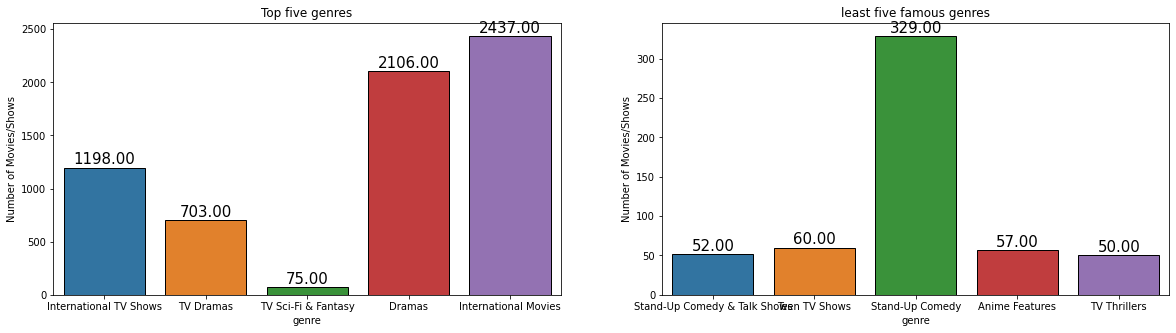

In [ ]:
# Top 5 genres
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plots=sns.barplot(x=genre_df['genre'][:5],y=genre_df['Number of Movies/Shows'][:5],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.title('Top five genres')
    
#least 5 famous genres
plt.subplot(1,2,2)
plots=sns.barplot(x=genre_df['genre'][-6:-1],y=genre_df['Number of Movies/Shows'][-6:-1],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.title('least five famous genres')
plt.show()

##### 1. Why did you pick the specific chart?

We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

From above graphs we can infer that 'International Movies' genre is most popular in movies and shows followed by Dramas.Where as Movies or shows with Standup comedy and talks and TV thrillers are least famous.














##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.

#### Chart - 3 (let's check top directors)

Text(0.5, 1.0, 'director who have directed highest number of Movies')

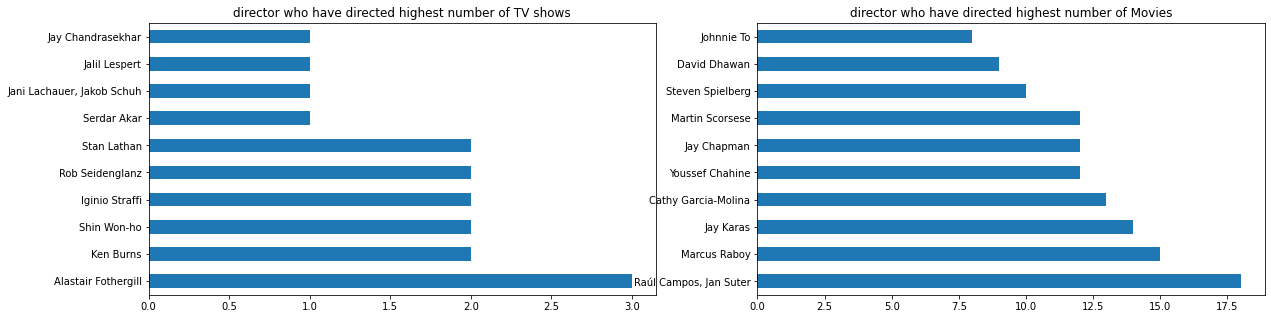

In [ ]:
# Top directors for TV shows
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
netflix[~(netflix['director']=='Unknown') & (netflix['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')

plt.title('director who have directed highest number of TV shows')

# Top directors for movies
plt.subplot(1,2,2)
netflix[~(netflix['director']=='Unknown') & (netflix['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('director who have directed highest number of Movies')

##### 1. Why did you pick the specific chart?

Above independent feature distribution bar charts are useful to compare different categorical or discrete variables.With the help of above charts we can get to know top directors from movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

From above bar plot we got to know that Alastair Fothergill has directed most of the TV Shows while Raul Campos and Jan Suter are most famous in terms of movie directors.

#### Chart - 4(Months in which more shows/ movies are added on netflix)

<AxesSubplot:xlabel='date_added_Month', ylabel='count'>

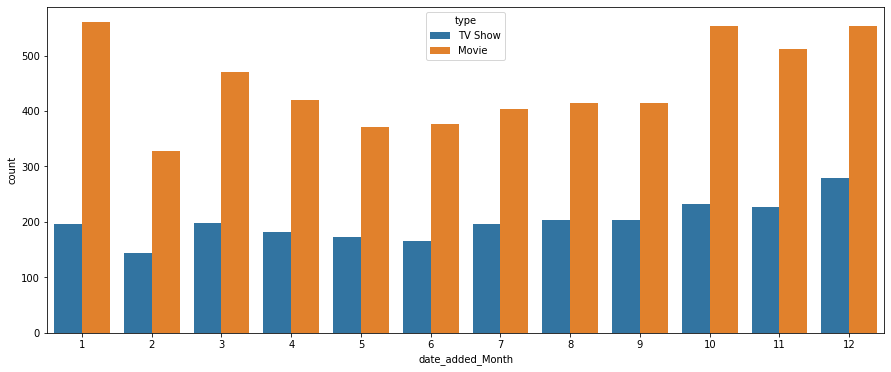

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='date_added_Month', hue='type',lw=5, data=netflix, ax=ax)

##### 1. Why did you pick the specific chart?

We plotted above count plot to know in which months more shows/movies are added on netflix.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows that the most content is added to Netflix from october to january.Even we can say that over the months, Netflix has consistently focused on adding more movies in its platform.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As age factor is quite responsible for cardiovascular risk we can target every individual regardless of there health situations and habits as everyone is going to age. Awareness can be spread which can help all companies and individuals wellbeing.

#### Chart - 5 (Let's check time span of movies/shows added on netflix after a release)

Text(0.5, 1.0, 'Plot between release_year and  date_added_Year')

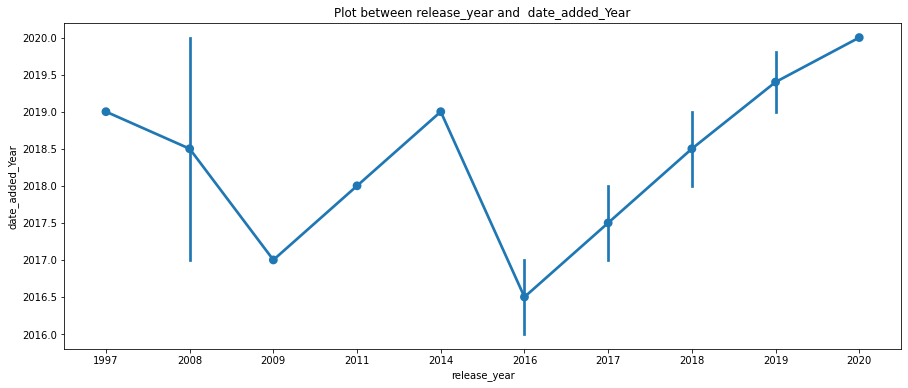

In [ ]:
# Plot between release_year and  date_added_Year
plt.figure(figsize=(15,6))
sns.pointplot(x= 'release_year', y= 'date_added_Year', data=netflix[:20])
plt.title('Plot between release_year and  date_added_Year')

##### 1. Why did you pick the specific chart?

We have plotted above point plot to check under how much span of time movies/shows are added on neflix after the release.A point plot represents an estimate of central tendency for a numeric variable by the position of the dot.

##### 2. What is/are the insight(s) found from the chart?

Earlier shows/ movies are not added imediately as they are released.As we can see from the graph,movies released in 1997 and 2008 are added in 2019 and 2018 respectively, reason for such a large span might be less popularity of neflix among viewres.But after 2016 shows/movies are added in the same year on neflix as they are released.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can observe that people are at equal risk regradless of they are smoking or not thus when an healthcare company is promoting any specific health care service be it Insurance, routine checkup plans, or tests, they can spread the awareness in no smoking community as well, which inturn increases the consumer base and give protection to wider population and profits to company.

#### Chart - 6(Top 10 countries with most contents)

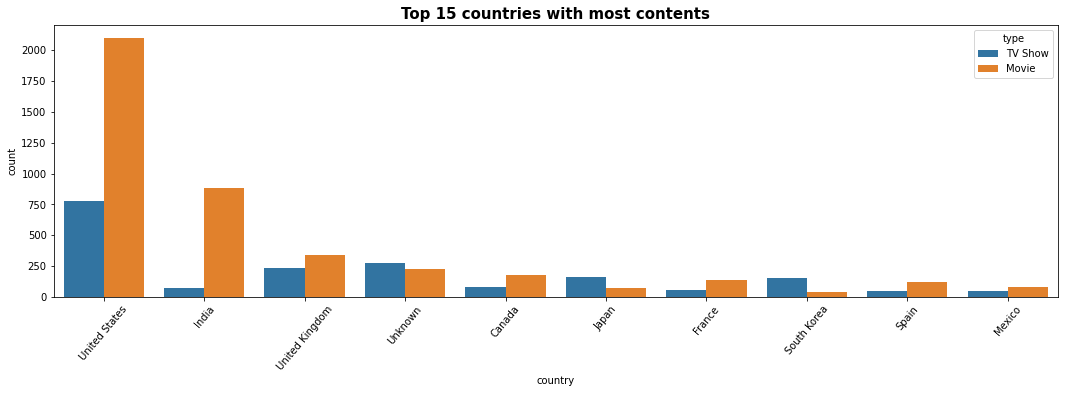

In [ ]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=netflix['country'],order=netflix['country'].value_counts().index[0:10],hue=netflix['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted above plot to check which country is top content producer.

##### 2. What is/are the insight(s) found from the chart?

We can infer that US and India produces highest amount of content which is added on netflix.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from above graph that there is slight difference of cholestrol levels looking at CHD patients and normal resident. Still to avoid a risk dignostic or fitness companines can provide medications or respective measures to reduce cholestrol.

### Multivariate Analysis

#### Chart - 6 (Correlation Heatmap)

<AxesSubplot:>

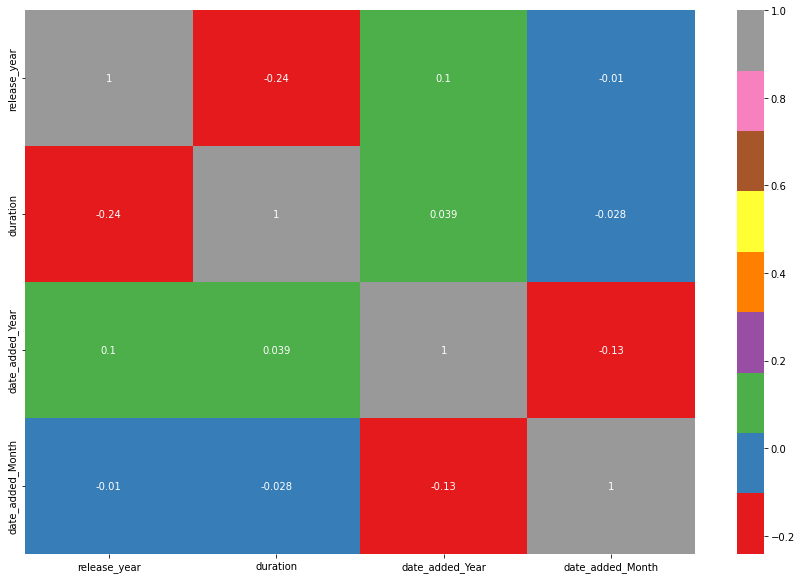

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(netflix.corr(), annot=True, cmap=sns.color_palette("Set1"))

##### 1. Why did you pick the specific chart?

Correlations are best represented  using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

We can infer from above graph that release_year and date added year are highly correlated with each other.






#### Chart - 15 - (Pair Plot)

In [ ]:
continous_variable=['date_added_Month','date_added_Year','release_year','duration']

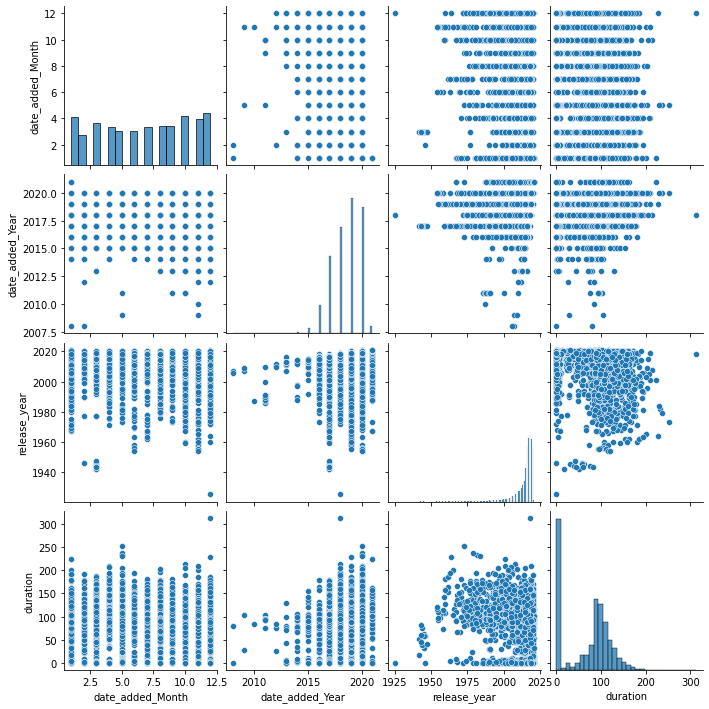

In [ ]:
# Pair Plot visualization code
sns.pairplot(netflix[continous_variable])

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can infer that more movies and shows are addded from 2016 just after they release and duration of movies is mostly 100 mins.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here

*   Null Hypothesis(H0) - Data set does not have any outliers.
*   Alternative Hypothesis(H1) - Dataset has outliers.


#### 2. Perform an appropriate statistical test.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'education'),
  Text(3, 0, 'cigsPerDay'),
  Text(4, 0, 'BPMeds'),
  Text(5, 0, 'prevalentStroke'),
  Text(6, 0, 'prevalentHyp'),
  Text(7, 0, 'diabetes'),
  Text(8, 0, 'totChol'),
  Text(9, 0, 'sysBP'),
  Text(10, 0, 'diaBP'),
  Text(11, 0, 'BMI'),
  Text(12, 0, 'heartRate'),
  Text(13, 0, 'glucose'),
  Text(14, 0, 'TenYearCHD')])

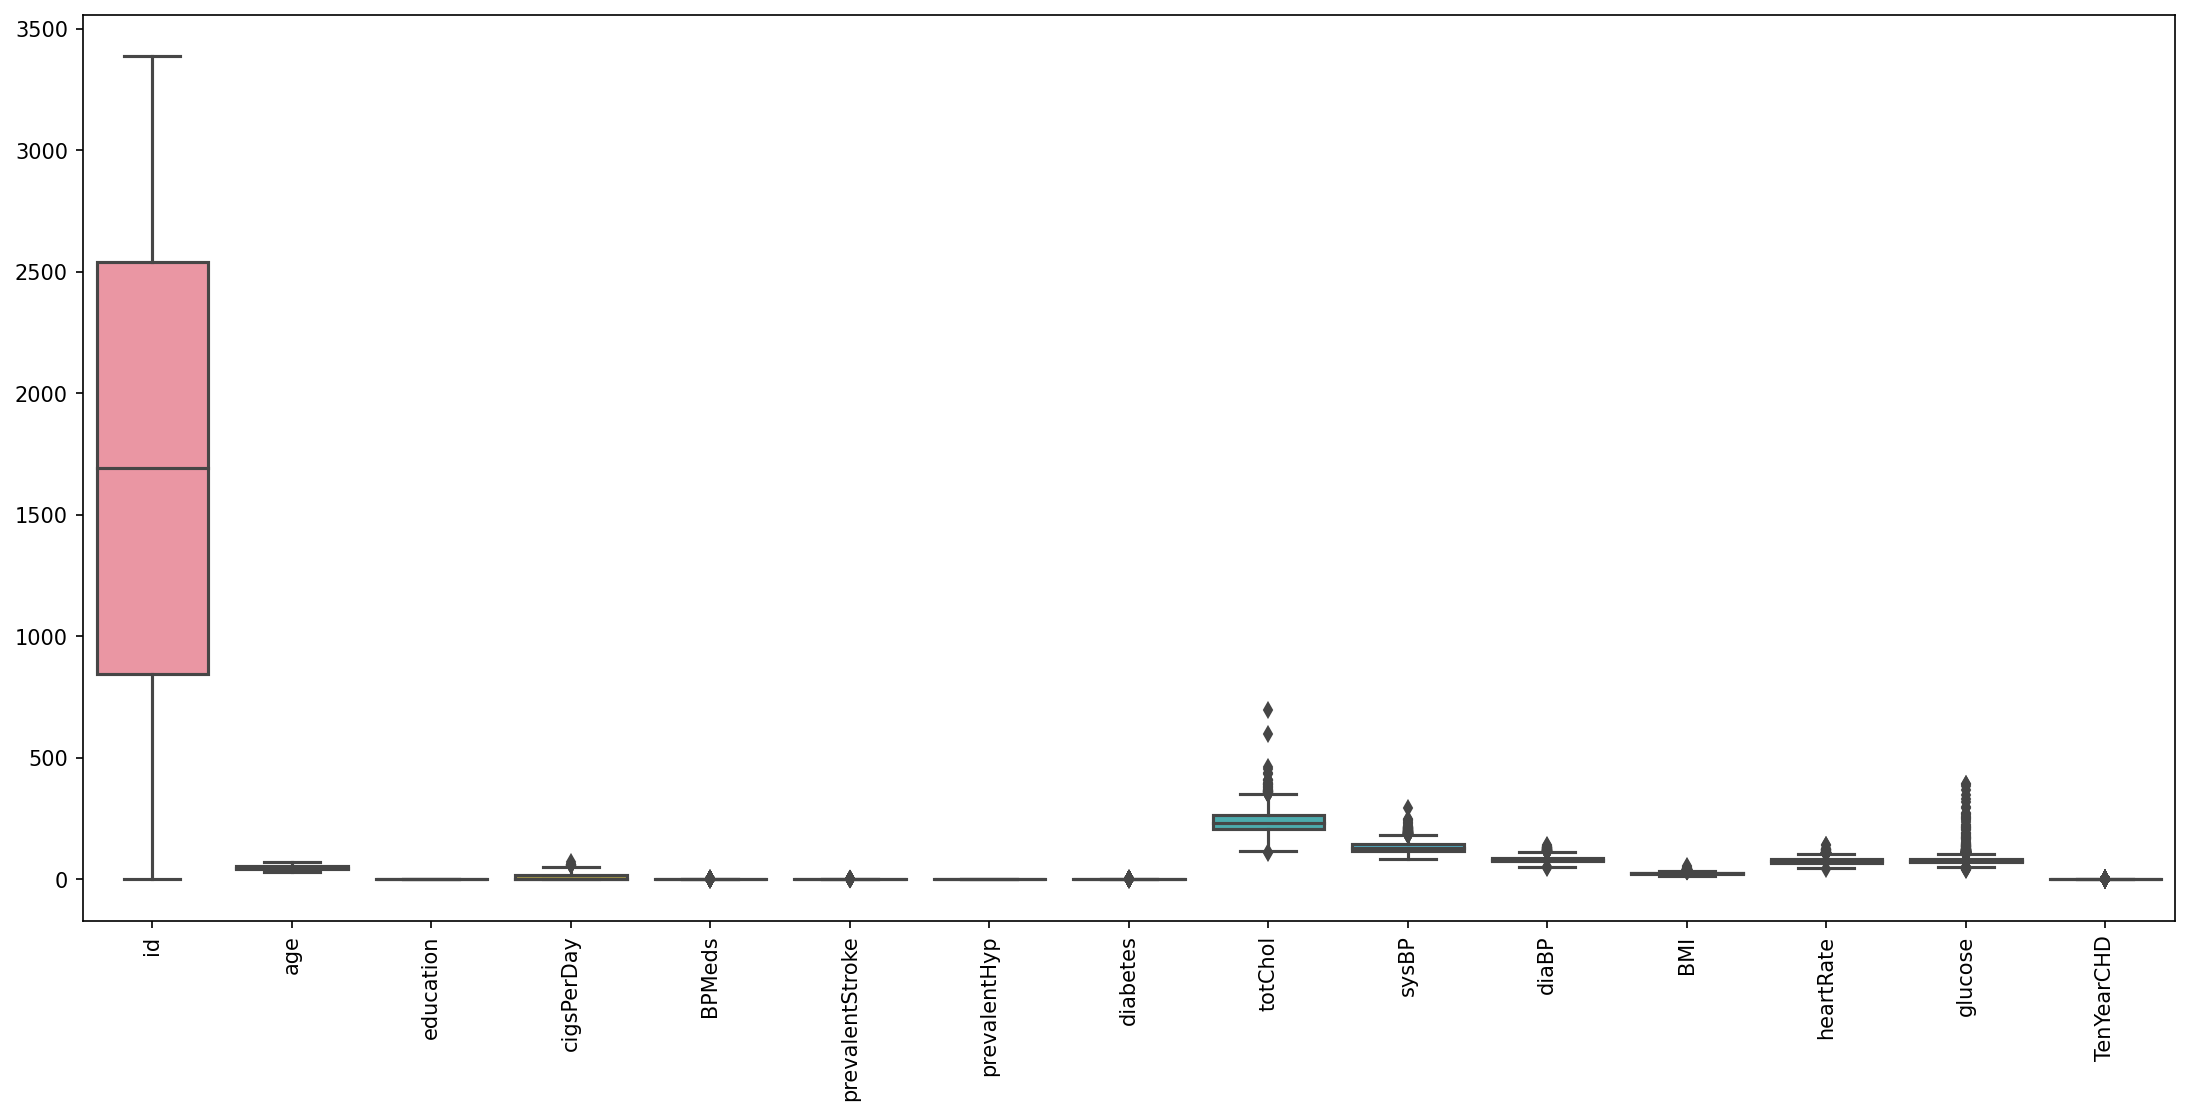

In [ ]:
# outliers check
plt.figure(figsize=(18,8),dpi=150)
sns.boxplot(data = df)
plt.xticks(rotation=90)

##### Which statistical test have you done to obtain P-Value?

We have used boxplots for the hypothesis testing, as we are determining the presence of outliers.

##### Why did you choose the specific statistical test?

Boxplots display a 5 number summary of data, this summary is first quartile, mean, third quartile, minimum, maximum, and the values beyond min and max are the outliers. and in the above test we can clearly see that we  have to reject our null hypothesis as our dataset has a lot of outliers.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   Null Hypothesis(H0) - Increasing age is an important factor that leads to cardiovascular diseases.
*   Alternative Hypothesis(H1) - Age is not related with cardiovascular risks.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency
  
# defining the table
data = [df['age'], df['TenYearCHD']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p value is 1.0
Accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

Chi Square Test

##### Why did you choose the specific statistical test?

We have used chi-square test in order to determine whether there is a significant association between the two variables. In our case 'age' and 'TenyearCHD' are the two variables. test shows that age and risk have a significant impact on each other,therefore we failed to reject null hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Null Hypothesis(H0) - mean of total cholestrol = 237
*   Alternative Hypothesis(H1) - mean of total cholestrol != 237

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['totChol'], x2=None, value=237)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")

0.9589015715213028
failed to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

Z-Test

##### Why did you choose the specific statistical test?

Z-Test is used usually when data points are independent of each other and data is normally distributed.
Failed to reject null hypothesis as the condition stands true.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Let's move ahead, as we have already delt with null/missing values from our dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have checked the outliers by plotting the box plot and then replaced the null values of various variables with mean, median,mode and 0 accordingly.

### 2. Handling Outliers

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

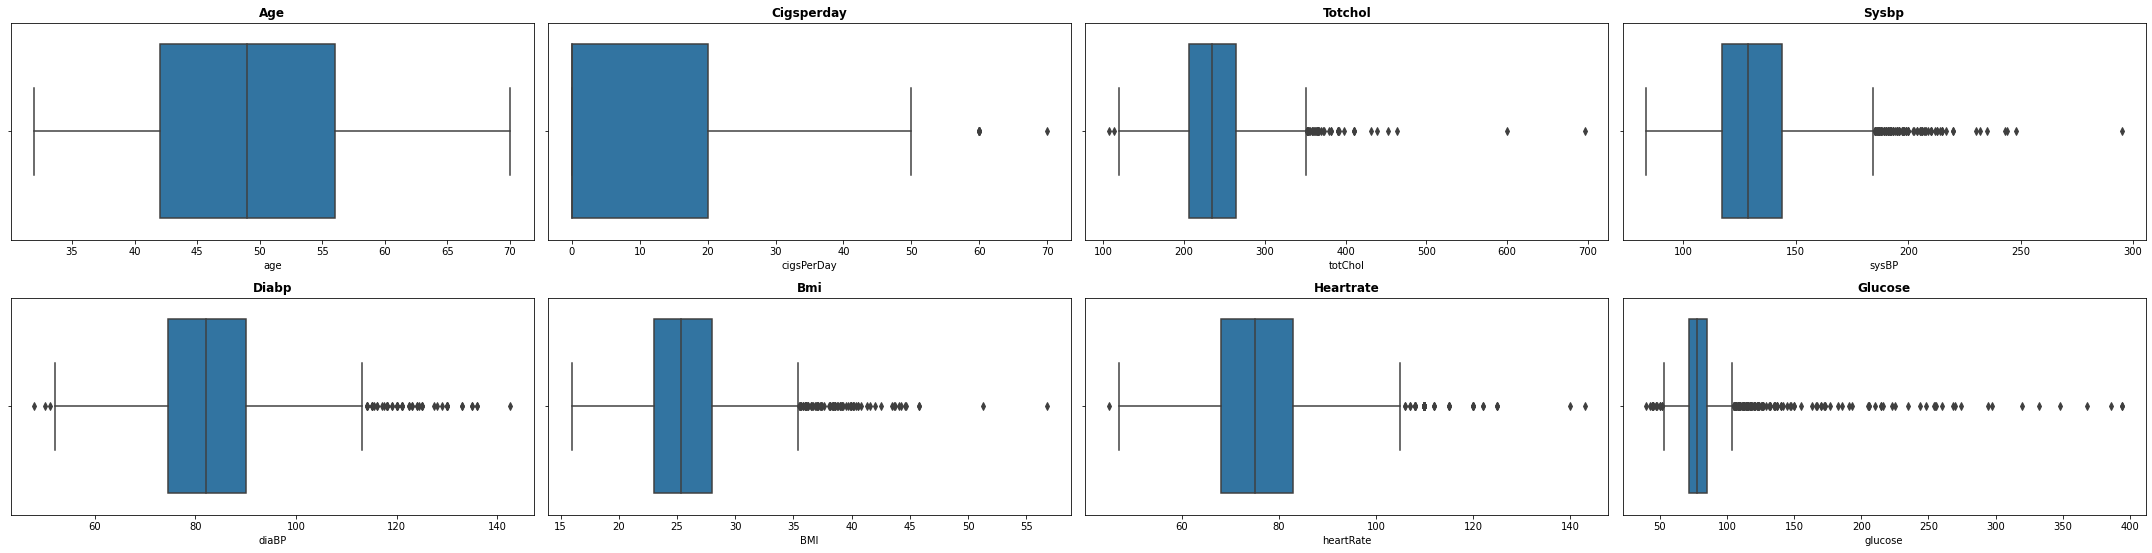

In [ ]:
# Plotting box plot for all the continous variable
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_variable):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

It is clear that we have outliers in most of the continous features but still we don't know the percentage of outliers in each of the feature. So, let's create a function that takes input as dataframe and list of continous feature and return the lower limit, upper limit,IQR, total outliers and percentage of outliers present in each continous feature.

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_variable:
  print(feature,":")
  detect_outliers(df[feature])
  print("-"*50)

age :
q1:42.0, q2:49.0, q3:56.0
Lower bound: 21.0, Upper bound: 77.0, IQR: 14.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %
--------------------------------------------------
cigsPerDay :
q1:0.0, q2:0.0, q3:20.0
Lower bound: -30.0, Upper bound: 50.0, IQR: 20.0
Total number of outliers are: 9
Total percentage of outlier is: 0.27 %
--------------------------------------------------
totChol :
q1:206.0, q2:234.0, q3:264.0
Lower bound: 119.0, Upper bound: 351.0, IQR: 58.0
Total number of outliers are: 43
Total percentage of outlier is: 1.27 %
--------------------------------------------------
sysBP :
q1:117.0, q2:128.5, q3:144.0
Lower bound: 76.5, Upper bound: 184.5, IQR: 27.0
Total number of outliers are: 105
Total percentage of outlier is: 3.1 %
--------------------------------------------------
diaBP :
q1:74.5, q2:82.0, q3:90.0
Lower bound: 51.25, Upper bound: 113.25, IQR: 15.5
Total number of outliers are: 58
Total percentage of outlier is: 1.71 %
-------------

##### What all outlier treatment techniques have you used and why did you use those techniques?

Even though we are having outliers in our data we did not treat it as our data is from medical domain and it is not good to loose any patients detail.

### 3. Categorical Encoding

In [ ]:
# Checking the object dtype variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Since, we have only two object dtype variable (sex and is_smoking) with two categories Male and Female, No and Yes. We can easily encode these categorical variable from BINARY LABEL ENCODING (0,1) and change the dtype from object to int.

In [ ]:
# Encode your categorical columns
df['sex'].replace({'M':0,'F':1},inplace=True)
df['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [ ]:
# Rechecking the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### What all categorical encoding techniques have you used & why did you use those techniques?

We are having two categorical features viz. sex and is_smoking having dtype as object.As there are only two possible values of a categorical features we have used **label encoding** technique to converting the labels into a numeric form so as to convert them into the machine-readable form.



### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
## Manipulate Features to minimize feature correlation and create new features
# Checking the features to exctract new feature from it
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


As we can observe from heatmap that sysBP and diaBP are highly correlated with each other.
So, let's create a feature as pulse_pressure which contains the information of both sysBP and diaBP.





In [ ]:
# Checking the head after extracting new feature
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Extracting new feature pulse_pressure with the help of sysBP and diaBP
df['pulse_pressure']= round(df['sysBP']-df['diaBP'],2)

Since Glucose and Diabetes are highly correlated, which is quite obvious as well. If a person has high glucose level (>140) then there are higher chances that the patient can suffer from Diabetes.So, let's create new feature as glucose_diabetes by using these two features.

In [ ]:
# Extracting new feature glucose_diabetes with the help of Glucose and Diabetes
df['glucose_diabetes'] = ((df['glucose'] > 140) & (df['diabetes'] == 1)).astype(int)

In [ ]:
# Checking the head after extracting new feature
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,pulse_pressure,glucose_diabetes
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,63.0,0
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,70.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,45.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,70.0,0
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,51.5,0


#### 2. Feature Selection

<AxesSubplot:>

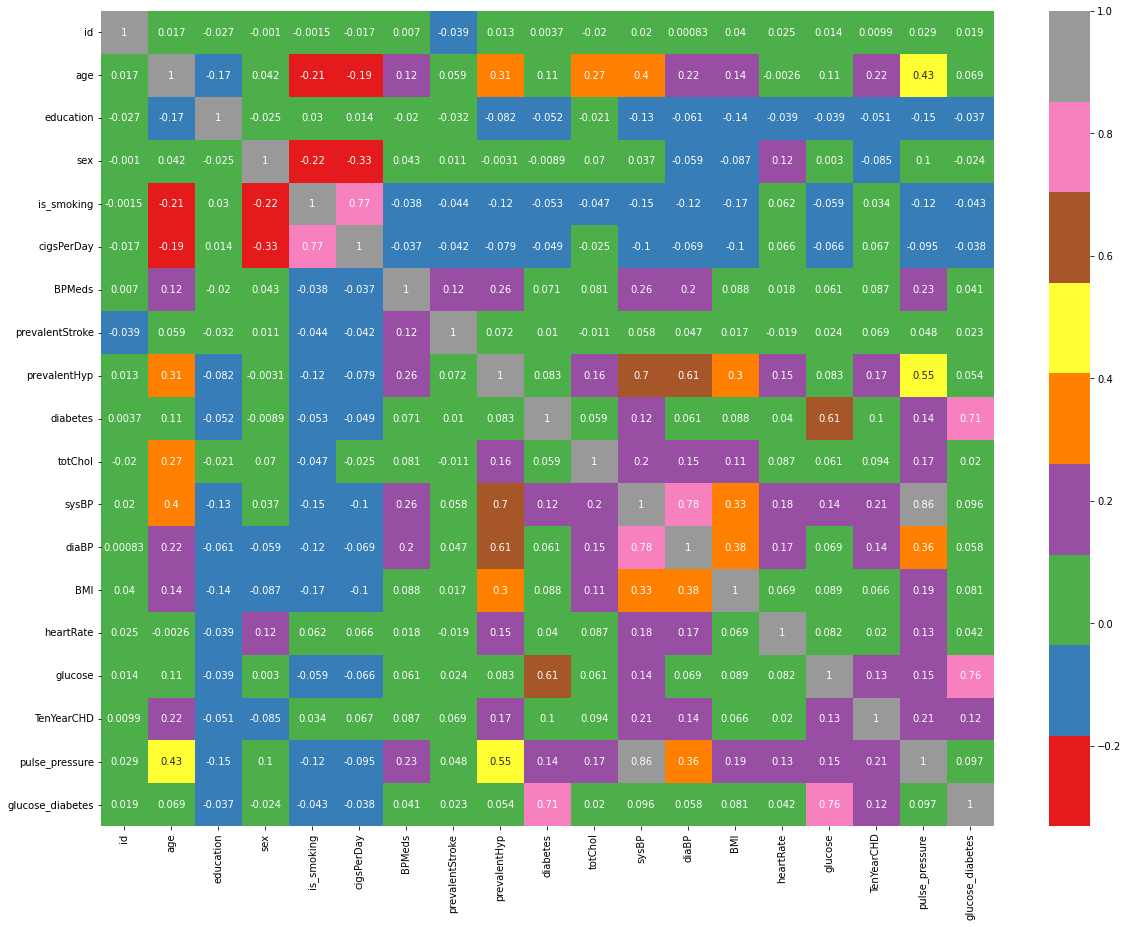

In [ ]:
## Select your features wisely to avoid overfitting
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

Let's include only those features in our final dataframe that are highly impacting on the dependent variable. For this we are using Variance Inflation Factor technique to determine multicolinearity.

In [ ]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculating VIF(Variance Inflation Factor) by excluding:

"TenYearCHD" -> As it is target variable

"id" -> As it is not giving any information

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD']]])

,variables,VIF
0,age,41.415094
1,education,4.589477
2,sex,2.761625
3,is_smoking,4.969682
4,cigsPerDay,4.241102
5,BPMeds,1.133012
6,prevalentStroke,1.027208
7,prevalentHyp,2.444629
8,diabetes,2.161273
9,totChol,31.151869


Now,let's exclude sysBP,diaBP,glucose and diabetes as we have already created two new features using them.along with it we will also exclude is_smoking as it is highly correlated with cigsPerDay.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking']]])

,variables,VIF
0,age,38.520769
1,education,4.407676
2,sex,2.747749
3,cigsPerDay,1.854801
4,BPMeds,1.130000
5,prevalentStroke,1.026376
6,prevalentHyp,2.097486
7,totChol,30.209232
8,BMI,33.703637
9,heartRate,33.868163


Let's exclude tot_chol as it is not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol']]])

,variables,VIF
0,age,33.221715
1,education,4.337051
2,sex,2.721586
3,cigsPerDay,1.836276
4,BPMeds,1.129465
5,prevalentStroke,1.025666
6,prevalentHyp,2.093642
7,BMI,31.837972
8,heartRate,32.442492
9,pulse_pressure,19.882292


Let's exclude BMI as it is having high VIF and not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol','BMI']]])

,variables,VIF
0,age,27.708603
1,education,4.293437
2,sex,2.702299
3,cigsPerDay,1.836097
4,BPMeds,1.129407
5,prevalentStroke,1.025662
6,prevalentHyp,2.089369
7,heartRate,25.202099
8,pulse_pressure,19.677486
9,glucose_diabetes,1.027428


At last, We will exclude heartRate as it is having high VIF and not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','education','totChol','BMI','heartRate']]])

,variables,VIF
0,age,16.250035
1,sex,2.531196
2,cigsPerDay,1.647940
3,BPMeds,1.124039
4,prevalentStroke,1.024570
5,prevalentHyp,2.063707
6,pulse_pressure,18.809109
7,glucose_diabetes,1.025981


In [ ]:
# Creating final dataframe considering above selected features
final_df= df[['age', 'education','sex','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','glucose_diabetes','pulse_pressure','TenYearCHD']]

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed that some features like BPmeds, diabetes, totchol etc. are positively correlated with target variable. While sex, education are negatively correlated with target variable.

We have also used **Filter method** with correlation heatmap and VIF(various inflation factor) and excluded some of the features that were creating noise while model implimentation.Also, we have removed multicolinearity and selected features that are highly dependant on our target variable.

##### Which all features you found important and why?

We have selected below features as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.


'age','education','sex','cigsPerDay',
'BPMeds','prevalentStroke','prevalentHyp',
'glucose_diabetes','pulse_pressure','TenYearCHD'.

### 5. Data Transformation

In [ ]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature age is: 39
The number of unique counts in feature education is: 4
The number of unique counts in feature sex is: 2
The number of unique counts in feature cigsPerDay is: 33
The number of unique counts in feature BPMeds is: 2
The number of unique counts in feature prevalentStroke is: 2
The number of unique counts in feature prevalentHyp is: 2
The number of unique counts in feature glucose_diabetes is: 2
The number of unique counts in feature pulse_pressure is: 173
The number of unique counts in feature TenYearCHD is: 2


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

Before Applying Transformation
Skewness of 'age','cigsPerDay'and 'pulse_pressure': 0.23, 1.23, 1.41
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


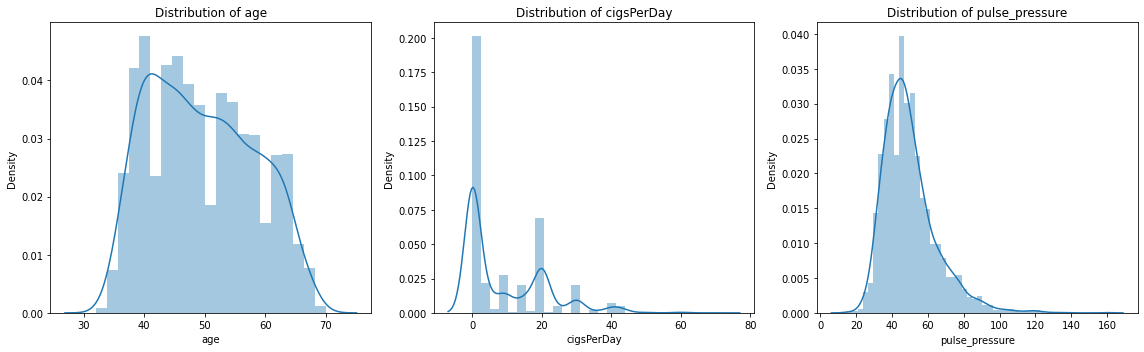

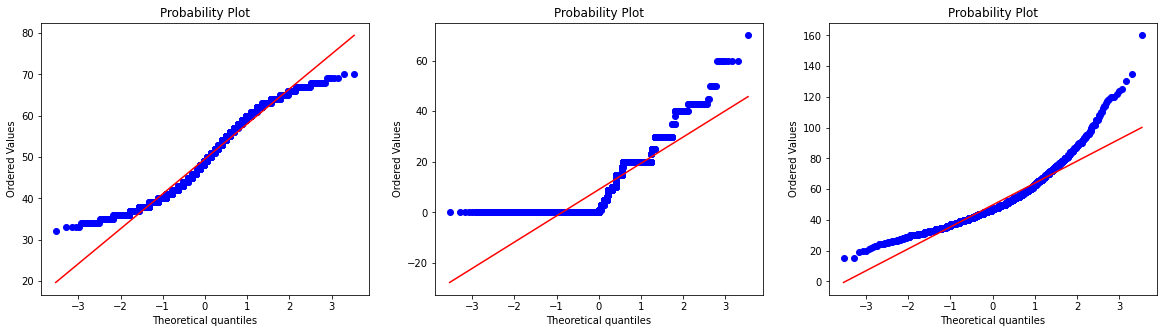

In [ ]:
# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("Before Applying Transformation")
print(f"Skewness of 'age','cigsPerDay'and 'pulse_pressure': {round(final_df['age'].skew(),2)}, {round(final_df['cigsPerDay'].skew(),2)}, {round(final_df['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)

plt.show()

It is clear from above distribution plots that they are not perfectly normally distributed. So we will apply some transformation techniques to get the normally disrtibuted data.

In [ ]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()

Logarithmic Transformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure' : -0.02, 0.28, 0.35
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


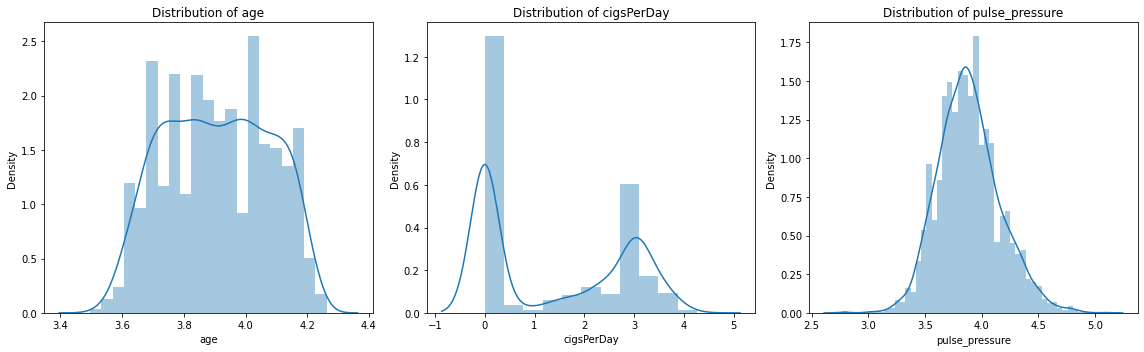

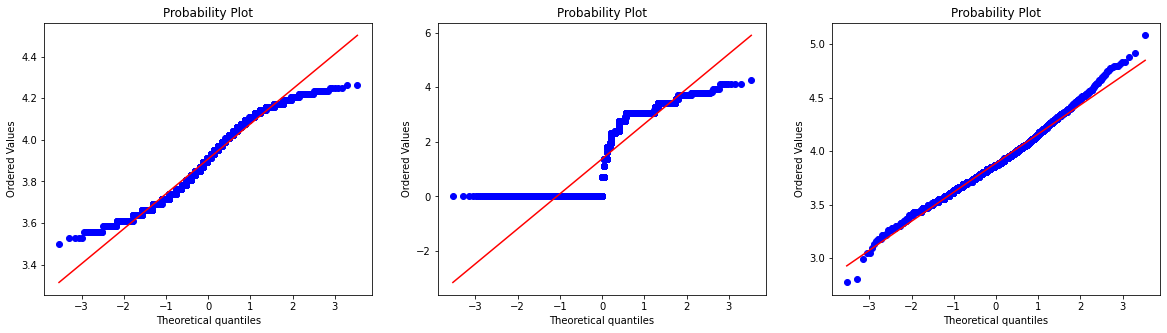

In [ ]:
# Applying transformation on the above considered columns
test_df1['age']=np.log(test_df1['age']+1)
test_df1['cigsPerDay']=np.log(test_df1['cigsPerDay']+1)
test_df1['pulse_pressure']=np.log(test_df1['pulse_pressure']+1)


# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure' : {round(test_df1['age'].skew(),2)}, {round(test_df1['cigsPerDay'].skew(),2)}, {round(test_df1['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)

plt.show()

Reciprocal Trnasformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure': 0.26, -0.06, 0.67
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


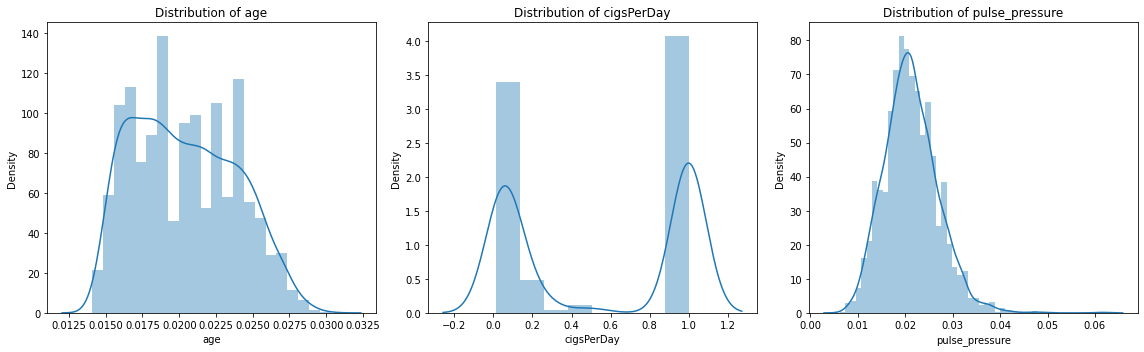

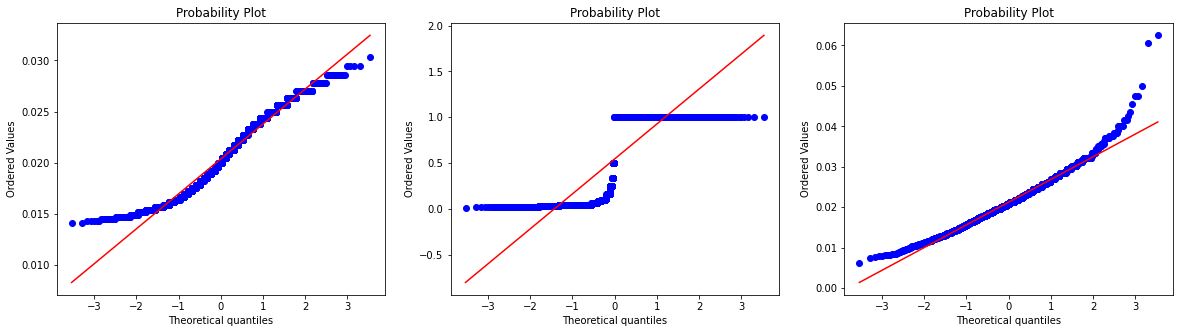

In [ ]:
# Applying transformation on the above considered columns
test_df2['age']=1/(test_df2['age']+1)
test_df2['cigsPerDay']=1/(test_df2['cigsPerDay']+1)
test_df2['pulse_pressure']=1/(test_df2['pulse_pressure']+1)


# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure': {round(test_df2['age'].skew(),2)}, {round(test_df2['cigsPerDay'].skew(),2)}, {round(test_df2['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)

plt.show()

Square Root Transformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure': 0.26, -0.06, 0.67
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


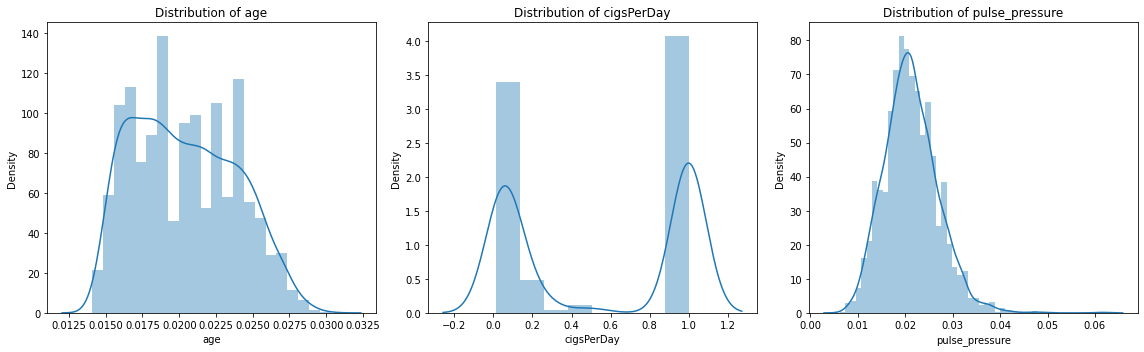

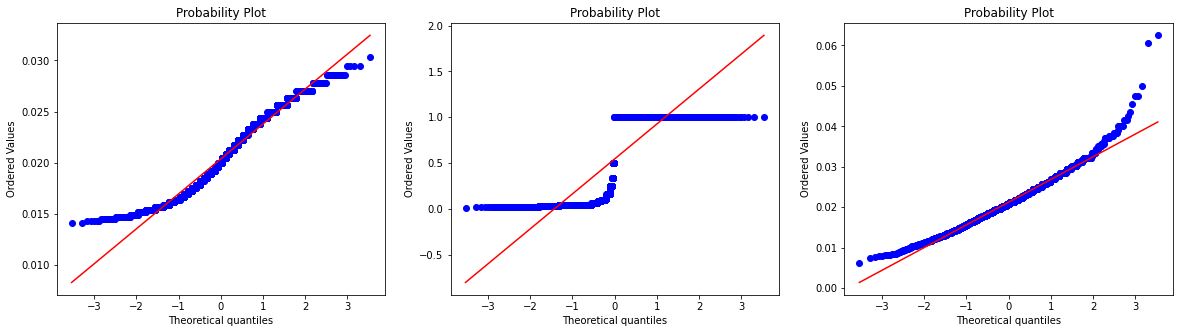

In [ ]:
# Applying transformation on the above considered columns
test_df3['age']=1/(test_df3['age']+1)
test_df3['cigsPerDay']=1/(test_df3['cigsPerDay']+1)
test_df3['pulse_pressure']=1/(test_df3['pulse_pressure']+1)

# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure': {round(test_df3['age'].skew(),2)}, {round(test_df3['cigsPerDay'].skew(),2)}, {round(test_df3['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)

plt.show()

Exponential Transformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure': 0.26, -0.06, 0.67
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


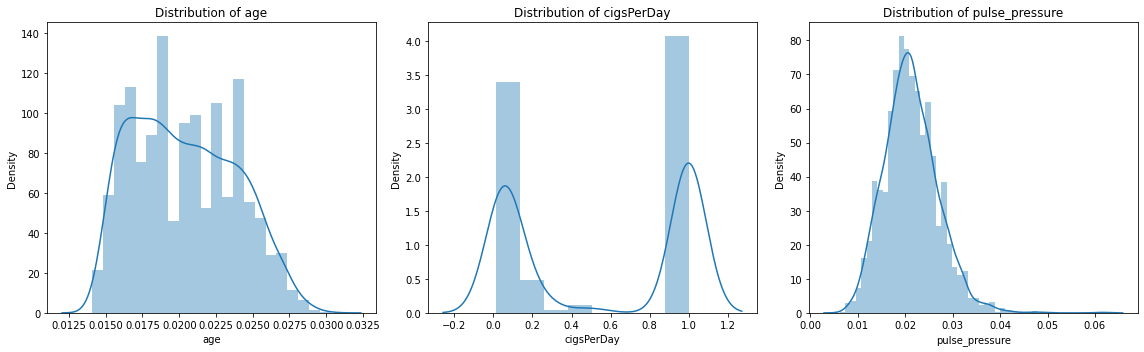

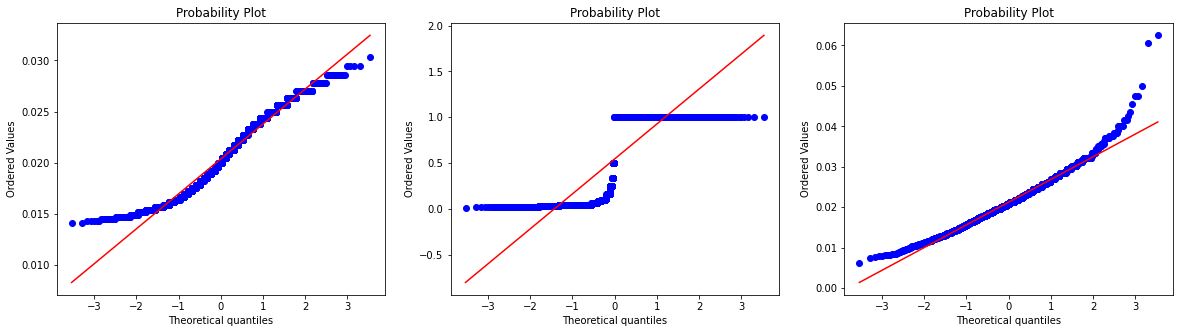

In [ ]:
# Applying transformation on the above considered columns
test_df4['age']=1/(test_df4['age']+1)
test_df4['cigsPerDay']=1/(test_df4['cigsPerDay']+1)
test_df4['pulse_pressure']=1/(test_df4['pulse_pressure']+1)

# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure': {round(test_df4['age'].skew(),2)}, {round(test_df4['cigsPerDay'].skew(),2)}, {round(test_df4['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df4,column)

plt.show()

From the above plots it is clear that:

1. Feature "age" needs Logarithmic transformation
2. Feature "cigsPerDay" no transformation needed
3. Feature "pulse_pressure" no transformation needed


In [ ]:
# Applying logarithmic transformation on age feature
final_df['age']=np.log(final_df['age']+1)

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x= final_df.drop(columns='TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
TenYearCHD
0             2303
1              409
dtype: int64
Distribution of classes of dependent variable in test :
TenYearCHD
0             576
1             102
dtype: int64


##### What data splitting ratio have you used and why? 


*   Train Set - 80
*   Test Set - 20

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Data set is highly imbalanced, which is obvious. Number of people prone to cardiovascular diseases will be less as compared to number of people who are not prone, numbers denoted for people who are prone is 1 and who are not prone is 0, and this imbalanced data will give highly biased results.

0    2879
1     511
Name: TenYearCHD, dtype: int64
Percentage of majority(0) and minority class(1): 84.93 % and 15.07 %


Text(0, 0.5, 'Frequency')

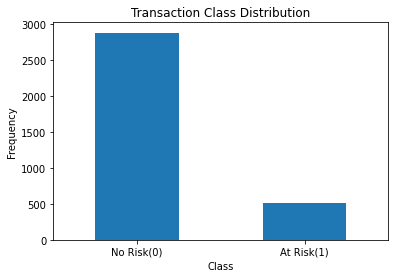

In [ ]:
# Handling Imbalanced Dataset (If needed)
print(final_df['TenYearCHD'].value_counts())
print(f"Percentage of majority(0) and minority class(1): {round(len(final_df[final_df['TenYearCHD']==0])*100/len(final_df['TenYearCHD']),2)} % and {round(len(final_df[final_df['TenYearCHD']==1])*100/len(final_df['TenYearCHD']),2)} %")

# Visualizing the imbalanced class
count_classes = pd.value_counts(final_df['TenYearCHD'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['No Risk(0)', 'At Risk(1)'])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the data
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_sm,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
TenYearCHD
0             2879
1              511
dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0             2879
1             2879
dtype: int64 



In [ ]:
# Respliting the dataset after using SMOTE
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_sm,y_sm , test_size = 0.2, random_state = 0) 

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

It is obvious that the classes are unbalanced, which would cause the model to be more biassed in favour of the "0" class (people with no Risk of CHD). We must discover a method for training a model such that it may accept some risk and provide more results in the "1" class.

We need to create a model that can forecast the risk of CHD, which is the rationale behind that. The model need to be able to foretell the risk of heart disease if there is even a remote possibility, given the patient's health statistics.

However, in a real-world scenario, our model is more beneficial because it is extremely likely that such a model will be able to anticipate whether a patient is at danger. Certainly, this would cause our model to reach a lower accuracy score since it is taking more risks for "at risk" patients.

A typical technique would have improved our accuracy in this case due to the class imbalance, but in the real world, such a model isn't an acceptable answer because it's predicted that it will frequently fail to determine whether the patient is at risk, defeating the goal of the project.

Therefore, we are using SMOTETomek on the training set to address these imbalances. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a type of data augmentation for the minority class. The strategy works because it generates convincing new synthetic examples from the minority class that are substantially near in feature space to already existing examples from the minority class.

### 9. Data Scaling

In [ ]:
## Scaling your data
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler= StandardScaler()

# Fit and Transform
x_smote_train= std_scaler.fit_transform(x_smote_train)
x_smote_test= std_scaler.transform(x_smote_test)

##### Which method have you used to scale you data and why?

We have used StandardScaler of sklearn library to scale our data.  This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable by comparing the magnitude of its coefficient. 

# **Conclusion**

## Conclusions drawn from EDA

*	In the dataset, **56.7% of individuals are female** and rest are male and **males are more prone to CHD** as compared to females.
*	**50.24%** of the individual present in the dataset are into **smoking** and residents who are **consuming more cigarettes** are at a **risk of getting suffered with Heart Diseases**. 
*	Only **2.9% people are taking BP Medicines** and **BP patients are having high chances of CHD.**
*	**0.6% and 31.5 %** people have a history of **strokes and hypertension** respectively.
*	**2.6%** people have **diabetes** who are more **prone to CHD**.
*	**15.1%** people have a **chance of getting heart diseases** in ten years.
*	In the dataset most of the population have **Education Level - 1 with 42.1% and least education level 4 with 11.3%** .
*	With **increasing age**, chances of having **cardiovascular disease increases**. People **above 65 years** (i.e. old people) are **more vulnerable to Heart Diseases**.
*	**sysBP and diaBP** are **positively correlated** with each other.
*	Patients who are **having stroke or hypertention history, diabetes are more prone to CHD**.
*	There are **more males consuming cigarattes** as compared to females.
*	 **Higher glucose level** lead to **heart diseases** resulting **higher chances** of **diabetic patients to cardiovascular disease**.


## Conclusions drawn from ML Model 

*   Implimented 6 classification ML Models **Logistic Regression, Random forest, XGboost, Naive Bayes, KNN and SVM** in our analysis.
*   Considered **XGboost as our final optimal model** as we are getting highest recall, precision, f1 score, accuracy and auc-roc from it.
*   Out of **1152 patients** our optimal model is correcly predicting **526 of class 0 and 509 of class 1 patients, other 90 and 27 are FN and FP cases**.
*   **Age, sex and pulse pressure** are the** highest contributing features** towards the predictions.
*  **Best parameters of XGboost** found out to be **learning_rate: 0.1, max_depth: 5 and n_estimators: 350.**
*  **No overtfitting has been observed** in any of the model.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***